In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(training_data, training_labels) , (test_data, test_labels) = fashion.load_data()

In [4]:
print(training_labels[:10])

[9 0 0 3 0 2 7 2 5 5]


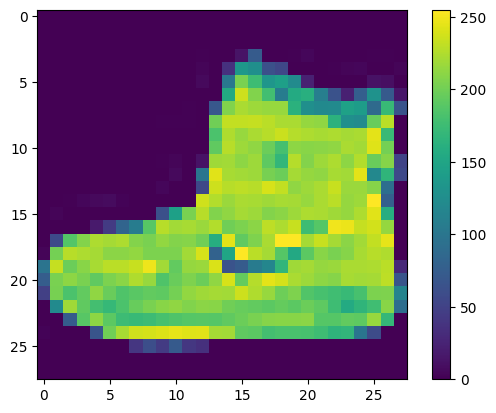

In [5]:
plt.imshow(training_data[0])
plt.colorbar()
plt.show()

In [6]:
training_data = training_data / 255
test_data = test_data / 255

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer=tf.optimizers.Adam() , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

In [12]:
callbacks = myCallback()

In [13]:
model.fit(training_data,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7929 - loss: 0.5856
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7930 - loss: 0.5852


In [14]:
model.evaluate(test_data,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.3907


[0.399939626455307, 0.8528000116348267]

In [15]:
prediction = model.predict(np.expand_dims(test_data[6],0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [16]:
np.argmax(prediction[0])

np.int64(4)